Here we will construct poisson solver for a 2D square boundary using a variation
fast fourier transform , dicrete sine transform.

There are 4 types of discrete sine transform,you can read more about them in
wikipedia http://en.wikipedia.org/wiki/Discrete_sine_transform

We will solve the 2D electrostatic equation for square boundary,in

$\epsilon_0=1~ units$

The poisson equation solver in 2D basically uses the matrix representation of the discrete poisson equation.

The poisson equation $\nabla^2 u= \rho$ can be solved using fourier transform technique.

This uses dst function(Type -I) from either fft.fftpack or a seperate
dst package



/opt/intel/intelpython2/lib/python2.7/site-packages/ipykernel_launcher.py:101: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


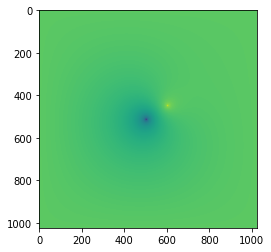

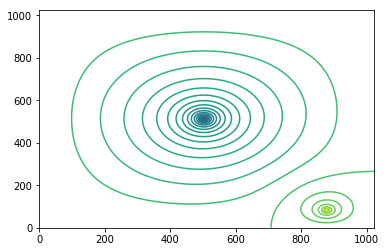

In [8]:
#This uses dst function(Type -I) from either fft.fftpack or a seperate


from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft,fft2,ifft2,ifft,irfft2,rfft2
import random as random
from mpl_toolkits.mplot3d import Axes3D
#Define a function for discrete sin transform using fft algorithm,by symmetrizing the function x


def dst(x,axis=-1):
    """Discrete Sine Transform (DST-I)

    Implemented using 2(N+1)-point FFT
    xsym = r_[0,x,0,-x[::-1]]
    DST = (-imag(fft(xsym))/2)[1:(N+1)]

    adjusted to work over an arbitrary axis for entire n-dim array
    """
    n = len(x.shape)
    N = x.shape[axis]
    slices = [None]*3
    for k in range(3):
        slices[k] = []
        for j in range(n):
            slices[k].append(slice(None))
    newshape = list(x.shape)
    newshape[axis] = 2*(N+1)
    xsym = np.zeros(newshape,np.float)
    slices[0][axis] = slice(1,N+1)
    slices[1][axis] = slice(N+2,None)
    slices[2][axis] = slice(None,None,-1)
    for k in range(3):
        slices[k] = tuple(slices[k])
    xsym[slices[0]] = x
    xsym[slices[1]] = -x[slices[2]]
    DST = fft(xsym,axis=axis)
    #print xtilde
    return (-(DST.imag)/2)[slices[0]]
#Define 2 dimensional DST, the idst is same as DST because of symmetry

#In [4]:
def dst2(x,axes=(-1,-2)):
    return dst(dst(x,axis=axes[0]),axis=axes[1])

def idst2(x,axes=(-1,-2)):
    return dst(dst(x,axis=axes[0]),axis=axes[1])
#Now define the poisson solver in 2D square boundary using the algorithm described above,this method can be
#generalised to arbitary retangular boundary

#In [5]:
def fft_poisson(f,h):

	m,n=f.shape
	f_bar=np.zeros([n,n])
	u_bar = f_bar			# make of the same shape
	u = u_bar

	f_bar=idst2(f)			# f_bar= fourier transform of f

	f_bar = f_bar * (2/n+1)**2  #Normalize
	#u_bar =np.zeros([n,n])
	pi=np.pi
	lam = np.arange(1,n+1)
	lam = -4/h**2 * (np.sin((lam*pi) / (2*(n + 1))))**2 #$compute $\lambda_x$
	#for rectangular domain add $lambda_y$
	for i in xrange(0,n):
		for j in xrange(0,n):
			u_bar[i,j] = (f_bar[i,j]) / (lam[i] + lam[j])

	u=dst2(u_bar)				#sine transform back
	u= u * (2/(n+1))**2			#normalize ,change for rectangular domain
	return u
#Fix the initial parameters,domain of the equation etc.

#set bounds a,b,parameters
a = 0; b = 1;	
alpha=10				#alpha is grid points=2^alpha
n=2**alpha
L=b-a					#length of system

xe =np.linspace(a,b,n); 
ye =np.linspace(a,b,n);
x, y = np.meshgrid(xe,ye)

h=L/(n);			#size 
h2 = h**2;			#h squared
hx2=h2; 			#started with a cube,hx2=hy2
hy2=h2;
f=np.zeros([n,n]);
#We put charges in the field.

#Putting a random negetive charge in the field alog with a posituve charge


#initial conditions

#f[round(n/2):n,round(n/2):n]=1; #Initial condition
f[round((n+1)/2),round((n+1)/2-10)]=20
#f[round((n+1)/2),round((n+1)/2+10)]=-20
f[random.randint(0,n),random.randint(0,n)]=-10	#put a random charge

nx,ny=np.array(f.shape)-1		 #last index
U=np.zeros([n,n])
#set boundary conditions


# BOUNDARY CONDITIONS
#set U(x,y)=g(x,y)
U[0,:]=0
U[nx,:]=0#5e-5
U[:,0]=0
U[:,ny]=0

##homogenize boundary condition

f[1,:]=f[1,:]+U[0,:]/hx2;
f[nx-1,:]=f[nx-1,:]+U[n-1,:]/hx2;

f[:,1]=f[:,1]+U[:,0]/hy2;
f[:,ny-1]=f[:,ny-1]+U[:,n-1]/hy2;
#Solve the equation:

U=fft_poisson(f,h)

plt.figure()
#plt.imshow((U),cmap='hot')
plt.contour(U,50)
#plt.contour(f)

plt.show()



plt.imshow(U)


 
